Ex. 1

a. Conduct a similar experiment as the one mentioned above with the genres: news, religion, government, fiction, romance as conditions, and occurrences of the words: he, she, her, him, as events. Make a table of the conditional frequencies and deliver code and table. (Hint: Have you considered case folding?)

conditions: news, religion, government, fiction, romance
events: he, she, her, him

In [1]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [2]:
from nltk.corpus import brown

In [3]:
conds = ["news", "religion", "government", "fiction", "romance"]
modals = ["he", "she", "her", "him"]

cfd = nltk.ConditionalFreqDist(
          (genre, word.lower())
          for genre in conds
          for word in brown.words(categories=genre))

cfd.tabulate(samples=modals)

             he  she  her  him 
   fiction 1308  425  413  382 
government  169    1    3   26 
      news  642   77  121   93 
  religion  206   12    8   94 
   romance 1068  728  680  340 


b. Answer in words what you see. How does gender vary with the genres?

He is the most frequent word of the 4 words across all genres. Fiction and romance seem the be the two genres where usage of male and female pronouns are more balanced. Eventhough they still are very imbalanced. The biggest differences you see in government.

This can mean that male characters are mentioned more often, and thus gets more attention in this sample. This is true even in the genre "romance" which I find suprising. The word her is used more often than him, but this is related to the fact that her also is a possessive pronoun.

c. First, consider the complete Brown corpus. Construct a conditional frequency distribution, which uses gender as condition, and for each gender counts the occurrences of nominative forms (he, she) and objective forms (him, her). Report the results in a two by two table. Then calculate the relative frequency of her from she or her, and compare to the relative frequency of him from he or him. Report the numbers. Submit table, numbers and code you used.

In [4]:
"""
modals = ["he", "she", "her", "him"]

nominative = ["he", "she"]
objecive = ["him", "her"]

male = ["he", "him"]
female = ["she", "her"]

him -> male, objective
her -> female, objective
she -> female, nominative
.
.
"""

gender_form_map = {
    "he" : ("male", "nominative"),
    "him" : ("male", "objective"),
    "she" : ("female", "nominative"),
    "her" : ("female", "objective")
}

cfd = nltk.ConditionalFreqDist(
          (gender_form_map[word.lower()][0], gender_form_map[word.lower()][1])
          for word in brown.words() if word in gender_form_map.keys()
)

cfd.tabulate()

       nominative  objective 
female       1949       2885 
  male       6566       2576 


In [5]:
# ratio of  nominative: he, she to objective: him, her

print( f'{cfd["female"]["nominative"] / cfd["female"]["objective"] :.3f}' )
print( f'{cfd["male"]["nominative"] / cfd["male"]["objective"] :.3f}' )

0.676
2.549


d. What could work is to use a tagged corpus, which separates between the two forms of her, i.e, if the corpus tags her as a personal pronoun differently from her as a possessive pronoun (determiner). The tagged Brown corpus does that. Use this to count the occurrences of she, he, her, him as personal pronouns and her, his, hers as possessive pronouns. See NLTK book, Ch. 5, Sec. 2, for the tagged Brown corpus. Report in a two-ways table.

In [6]:
nltk.download('universal_tagset')
brown_uni = brown.tagged_words(tagset="universal")

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


In [7]:
prons = ["her", "she", "he", "him", "his", "hers"]
tags = ["DET", "PRON"]

cfd = nltk.ConditionalFreqDist(
          (word.lower(), tag)
          for word, tag in brown_uni if word.lower() in prons and tag in tags
)

cfd.tabulate()

      DET PRON 
  he    0 9546 
 her 1929 1107 
hers    0   16 
 him    0 2619 
 his 6957   37 
 she    0 2860 


e. We can now correct the numbers from point (b) above. How large percentage of the feminine personal pronoun occurs in nominative form and in objective form? What are the comparable percentages for the masculine personal pronoun?




In [8]:
print(f"Male objective/nominative = {( cfd['him']['PRON'] / cfd['he']['PRON']) * 100 :.2f} %.") 

Male objective/nominative = 27.44 %.


In [9]:
print(f"Female objective/nominative = {( cfd['her']['PRON'] / cfd['she']['PRON'] ) * 100 :.2f} %.") 

Female objective/nominative = 38.71 %.


f. Illustrate the numbers from (d) with a bar chart.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

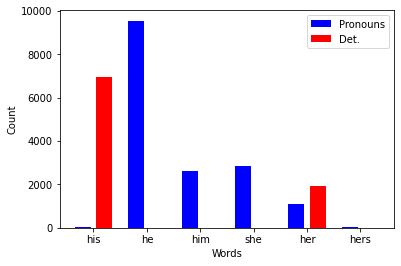

In [11]:
words = ['his','he','him','she','her','hers']
prons = [cfd[word]["PRON"] for word in words]
dets = [cfd[word]["DET"] for word in words]
X_axis = np.arange(len(words))

plt.bar(X_axis - 0.2, prons, width=0.3, color='b', align='center', label="Pronouns")
plt.bar(X_axis + 0.2, dets, width=0.3, color='r', align='center', label="Det.")

plt.xticks(X_axis, words)
plt.xlabel("Words")
plt.ylabel("Count")
plt.legend()
plt.show()

g. Write a short essay (200-300 words) where you discuss the consequences of your findings. Consider in particular, why do you think the masculine pronoun is more frequent than the feminine pronoun? If you find that the there is a different distribution between nominative and objective forms for the masculine and the feminine pronouns, why do you think that is the case? Do you see any consequences for the development of language technology in general, and for language technology derived from example texts in particular? Make use of what you know about the Brown corpus.

Answer:
Unsurprisingly the male pronoun is more frequent than the female. The difference in usage is quite substantial. When we work with Brown corpus, we should keep in mind that this is an old corpus from the 1960’s. Women rights where less than now, and women more often stayed at home taking care of children and the home. A direct consequence of this is less usage of the female pronouns in the categories represented, such as government, religion and news. Although the corpus is old, I still believe there would an imbalance in the usage of pronouns if the corpus was made today. But perhaps not as great.

She and he is used more frequent than their objective forms her and him. But the ratio of her too she is greater than the male counterpart. The nominative form (she and he) typically refers to the subject of the sentence. While the objective forms (her and him) points to the object. Therefore, we can say that in the Brown corpus, looking at pronouns, females are more often the object in a sentence relative to being the subject compared to males. We could say that females are relatively less talked of as the main antagonist in the text.

A big problem when developing language technology is biased text. This is the case with the Brown corpus. If we where to for example generate text based on this corpus males would more often than females be presented as the main antagonist. We would also expect other negative tendencies that where present in the 1960’s to be reflected in the generated text, such as racism and homophobic tendencies.

Ex. 2

a. First, you need to get hold of the text. You can download it from project Gutenberg as explained in section 1 in chapter 3 in the NLTK book. You find it here: https://www.gutenberg.org/files/74/74-0.txt

In [12]:
from urllib import request

url = "https://www.gutenberg.org/files/74/74-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

b. Then you have to do some clean up. The downloaded text contains a preamble and a long appendix about the Gutenberg project and copyrights that should be removed.

In [13]:
start_idx = raw.find("HARTFORD, 1876.") + len("HARTFORD, 1876.")
end_idx = raw.find("*** END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER ***")

corpus = raw[start_idx:end_idx]

c. You can then extract the words. We are interested in the words used in the book and their distribution. We are, e.g. not interested in punctuation marks. Should you case fold the text? Explain the steps you take here and in point (b) above.

I find the indices of where the text starts and ends. I use the indicies to slice the text. Now I have the body of the book stored in a variable. Then I perform a series of actions. I remove occourences

I replace all except charachters and numbers with whitespace using regex. This might cause some problems for decimals, but I don't think this will be important.
I casefold the text and remove leading and trailing whitespace.
I replace multiple whitespaces with a single whitespace.

In [18]:
import re
import pandas as pd

In [15]:
corpus_regex = re.sub(r'[^\w]', ' ', corpus).lower().strip()
corpus_regex = re.sub(' +', ' ', corpus_regex)

In [16]:
gutenberg_freqdist = nltk.FreqDist(corpus_regex.split())

In [17]:
gutenberg_freqdist.most_common(20)

[('the', 3700),
 ('and', 3105),
 ('a', 1864),
 ('to', 1715),
 ('of', 1435),
 ('it', 1315),
 ('he', 1248),
 ('was', 1166),
 ('that', 1023),
 ('i', 1012),
 ('in', 941),
 ('you', 876),
 ('s', 845),
 ('his', 815),
 ('tom', 773),
 ('t', 667),
 ('with', 646),
 ('they', 614),
 ('but', 581),
 ('for', 525)]

e. Consider the frequencies of frequencies. How many words occur only 1 time? How many words occur n times, etc. for n = 1, 2, …, 10; how many words have between 11 and 50 occurrences; how many have 51-100 occurrences; and how many words have more than 100 occurrences? Report in a table!

In [20]:
freq_of_freq = nltk.FreqDist([count for _, count in gutenberg_freqdist.most_common()])

def sum_of_range(r, freq_of_freq):
  sum_of_r = 0
  for i in r:
    sum_of_r += freq_of_freq[i]
  return sum_of_r

d = {}

for i in range(1, 11):
  d[str(i)] = str(freq_of_freq[i])

d["11-50"] = str(sum_of_range(range(11,51), freq_of_freq))
d["51-100"] = str(sum_of_range(range(51,101), freq_of_freq))
d["101 - max"] = str(sum_of_range(range(101, max(freq_of_freq) + 1),
                                  freq_of_freq))


In [21]:
table = pd.DataFrame(index = d.keys(), columns = ["n"], data = d.values())
table.T

,1,2,3,4,5,6,7,8,9,10,11-50,51-100,101 - max
n,3585,1181,616,378,224,174,166,120,85,87,499,84,110


f. We order the words by their frequencies, the most frequent word first. Let r be the frequency rank for each word and n its frequency. Hence, the most frequent word gets rank 1, the second most frequent word gets rank two, and so on. According to Zipf’s law, rn should be nearly constant. Calculate rn for the 20 most frequent words and report in a table. How well does this fit Zipf’s law? Answer in text.

In [22]:
most_common_20 = gutenberg_freqdist.most_common(20)

def zipfs_law(word_count):
  rns = []
  rank = 1
  for w, c in word_count:
    rns.append(c*rank)
    rank += 1
  return rns

zipfs_law(most_common_20)

[3700,
 6210,
 5592,
 6860,
 7175,
 7890,
 8736,
 9328,
 9207,
 10120,
 10351,
 10512,
 10985,
 11410,
 11595,
 10672,
 10982,
 11052,
 11039,
 10500]

Zipf's law doesn't seem to fit very well for the 6-7 highest ranked words, but fore the remaining it seems to fit ok.

g. Try to plot the rank against frequency for all words (not only the 20 most frequent ones). First, make a plot where you use linear scale on the axes. Then try to make a plot similarly to the Wikipedia figure below with logarithmic scales at both axes. Logarithms are available in numpy, using functions functions like log(), for the natural logarithm, and log2() for the base-2 logarithm. An alternative to using one of these functions is to explore loglog() plotting from matplotlib.pyplot directly.

In [23]:
import matplotlib.pyplot as plt

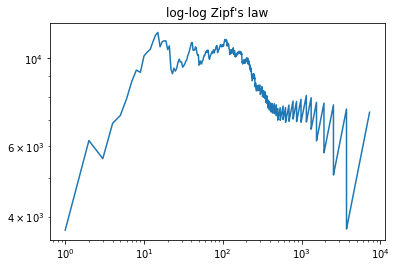

In [24]:
rns = zipfs_law(gutenberg_freqdist.most_common())
ranks = [i for i in range(1, len(rns) +1 )]

plt.loglog(ranks, rns)
plt.title("log-log Zipf's law")
plt.show()
plt.close()

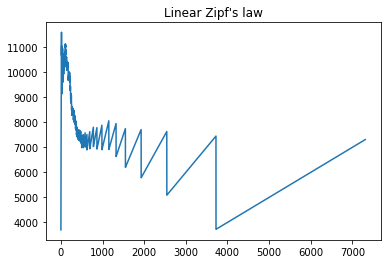

In [25]:
plt.plot(ranks, rns)
plt.title("Linear Zipf's law")
plt.show()
plt.close()